In [14]:
# Generate distributions of contact (from pairix) strength for FOCS predicted EPIs
# Author: Joshua Price
# Started: Nov 25, 2018
# Last Edited: Nov 27, 2018
# Runtime: ~30 min

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
chrnum = 'X'
chr_run = 'chr' + chrnum

In [16]:
# Import promoter list from FOCS
ep = pd.read_csv('/data2/josh/ep/fantom_mm10_E-P.txt', sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7])
ep.columns = ['p_chr', 'p_start', 'p_end', 'p_dir', 'contact_id','e_chr','e_start','e_end']
ep['p_center'] = (ep['p_start']+ep['p_end'])/2
ep['e_center'] = (ep['e_start']+ep['e_end'])/2
ep['distance'] = abs(ep['p_center'] - ep['e_center'])
ep_long = ep[ep['distance'] > 5000]
epoi = ep_long[(ep_long['p_chr']==chr_run) & (ep_long['e_chr']==chr_run)]

In [17]:
epoi.shape

(540, 11)

In [18]:
# Import chr1 contact list (takes ~90 sec on Alineos)
pairs = pd.read_csv('/data2/josh/contacts/pairsChr' + chrnum + '.csv')

In [19]:
pairs_long = pairs[(pairs['pos2'] - pairs['pos1'] > 5000)]

In [20]:
# Label promoters and enhancers as contacting or not (takes ~30 min)
contacting_list = [None] * epoi.shape[0]
counter = 0
for idx, row in epoi.iterrows():
    e_start = row.e_start
    e_end = row.e_end
    p_start = row.p_start
    p_end = row.p_end

    contacts = pairs_long[((pairs_long['pos1'] > e_start) & (pairs_long['pos1'] < e_end) & 
                     (pairs_long['pos2'] > p_start) & (pairs_long['pos2'] < p_end)) |
                    ((pairs_long['pos2'] > e_start) & (pairs_long['pos2'] < e_end) & 
                     (pairs_long['pos1'] > p_start) & (pairs_long['pos1'] < p_end))]

    if contacts.empty:
        epoi.loc[idx,'ep_status'] = 'N'
    else:
        epoi.loc[idx,'ep_status'] = 'EP'
    if idx % 10 == 0:
        print(counter / 2314)
    counter += 1

# epoi['ep_status'] = contacting_list

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.003025064822817632
0.007346585998271392
0.010371650821089023
0.014693171996542784
0.018150388936905792
0.022039757994814176
0.02592912705272256
0.029818496110630942
0.03327571305099395
0.03759723422644771
0.04148660328435609
0.0449438202247191
0.04840103716508211
0.05229040622299049
0.055315471045808126
0.05920484010371651
0.06179775280898876
0.06525496974935177
0.06957649092480553
0.07389801210025929
0.07778738115816768
0.08038029386343994
0.08426966292134831
0.08686257562662057
0.09334485738980121
0.09766637856525497
0.10198789974070872
0.1063094209161625
0.10933448573898012
0.11365600691443388
0.11797752808988764
0.1222990492653414
0.12662057044079517
0.13050993949870354
0.13267070008643042
0.13699222126188418
0.13958513396715644
0.1439066551426102
0.14822817631806395
0.15211754537597233
0.15643906655142611
0.1603284356093345
0.16378565254969749
0.1676750216076059
0.17199654278305965
0.1763180639585134
0.1797752808988764
0.18409680207433016
0.18841832324978391
0.19273984442523767


In [21]:
activeEP = epoi[epoi['ep_status']=='EP']

In [22]:
# Import TADs
tads = pd.read_csv('/data2/josh/tads/TAD_mm10.csv', delimiter='\t')
tads = tads[tads['chrom'] == chr_run]
tads.head()

,chrom,start,end
2202,chrX,161385000,161825000
2203,chrX,71640000,71965000
2204,chrX,94240000,94635000
2205,chrX,139370000,139685000
2206,chrX,134060000,134455000


In [23]:
# Label EPIs as Inter or Intra
# pix1_tad_list1 = [None] * pix1.shape[0]
activeEP['tad_status'] = ''
for idx, row in activeEP.iterrows():
    p_start = row['p_start']
    p_end = row['p_end']
    e_start = row['e_start']
    e_end = row['e_end']
    
    p_tad_matches = tads[((tads['start'] < p_start) & (tads['end'] > p_end))]
    e_tad_matches = tads[((tads['start'] < e_start) & (tads['end'] > e_end))]
    if p_tad_matches.empty and e_tad_matches.empty:
        activeEP.loc[idx,'tad_status'] = 'TAD-less'
    elif (p_tad_matches.empty and not e_tad_matches.empty) or (e_tad_matches.empty and not p_tad_matches.empty):
        activeEP.loc[idx,'tad_status'] = 'Inter'
    elif p_tad_matches.index[0] == e_tad_matches.index[0]:
        activeEP.loc[idx,'tad_status'] = 'Intra'
    else:
        activeEP.loc[idx,'tad_status'] = 'Inter'

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
activeEP['tad_status'].value_counts()

TAD-less    3
Name: tad_status, dtype: int64

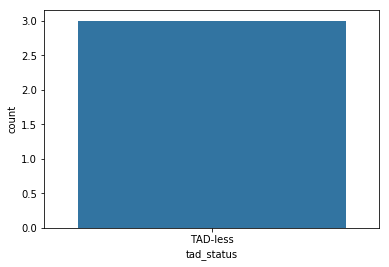

In [25]:
ax2 = sns.countplot(x="tad_status", data=activeEP)

In [26]:
activeEP.to_csv('/data2/josh/ep/activePairixChr' + chrnum + '.csv')